In [1]:
import abtem
import ase
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams["font.family"] = "serif"
# plt.rcParams["font.serif"] = ["Times"]

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='x [Å]', ylabel='y [Å]'>)

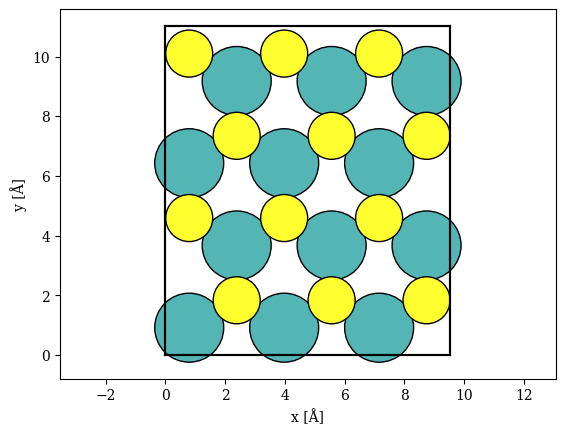

In [51]:
atoms = ase.build.mx2(vacuum=2)

atoms = abtem.orthogonalize_cell(atoms)
atoms *= (3, 2, 1)

atoms.set_cell([(9.540000000000001,0,0), (0,11.01584313613806,0), (0,0,21.57)])
atoms.center(axis=(0,1,2))

# del atoms[19]
# del atoms[20]

abtem.show_atoms(atoms)


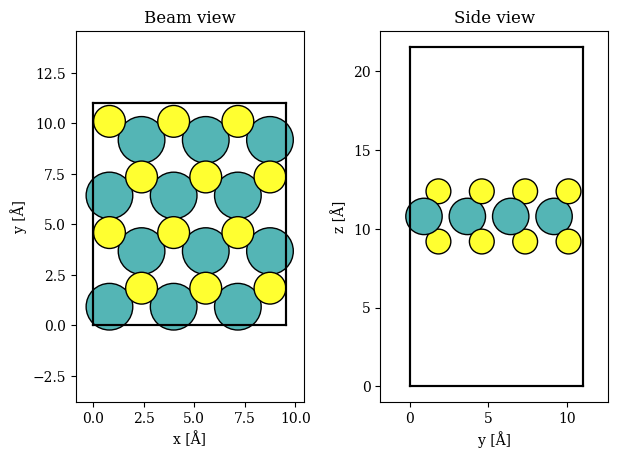

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2)
abtem.show_atoms(atoms, plane="xy", ax=ax1, title="Beam view")
abtem.show_atoms(atoms, plane="yz", ax=ax2, title="Side view");
plt.tight_layout(pad=1.5)
# plt.savefig("bwsp_graphene_ase.png", dpi=900, bbox_inches='tight')

In [53]:
frozen_phonons = abtem.FrozenPhonons(atoms, 16, sigmas=0.2)

In [54]:
potential = abtem.Potential(
    frozen_phonons,
    sampling=0.05,
    projection="infinite",
    slice_thickness=1,)

In [55]:
wave = abtem.PlaneWave(energy=300e3)

In [56]:
exit_wave = wave.multislice(potential)

In [57]:
exit_wave.compute()

[########################################] | 100% Completed | 1.03 sms


In [58]:
Cs = 0  # spherical aberration (-8 um)

ctf = abtem.CTF(Cs=Cs, energy=wave.energy, defocus=0, semiangle_cutoff=45)

print(f"defocus = {ctf.defocus:.2f} Å")

defocus = 0.00 Å


In [59]:
Cc = 1.0e-2 * 1e10  # chromatic aberration (1.2 mm)
energy_spread = 0.35  # standard deviation energy spread (0.35 eV)

focal_spread = Cc * energy_spread / exit_wave.energy

incoherent_ctf = ctf.copy()
incoherent_ctf.focal_spread = focal_spread

In [60]:
measurement_ensemble = exit_wave.apply_ctf(incoherent_ctf).intensity()

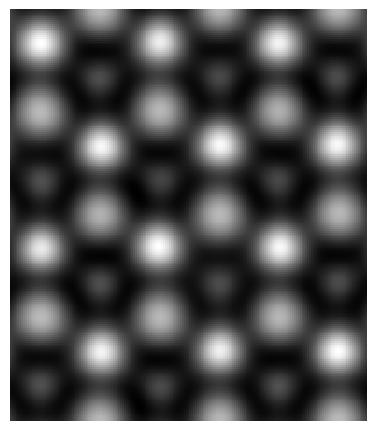

In [63]:
measurement = measurement_ensemble.mean(0)

measurement.show(cmap='gray');
# plt.tight_layout()
plt.axis('off')
plt.savefig('mos2_abtem_sim.pdf', dpi=900, bbox_inches='tight', pad_inches=0)

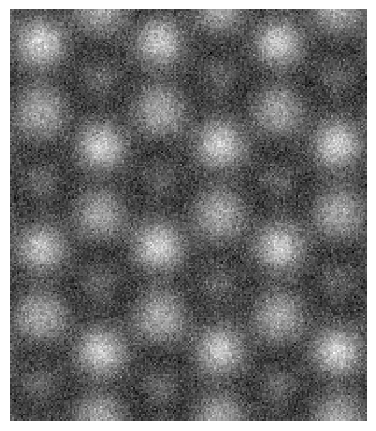

In [64]:
noisy_measurement = measurement.poisson_noise(dose_per_area=1e8)

noisy_measurement.show(cmap='gray');
plt.axis('off')
plt.savefig('mos2_abtem_sim-noise.pdf', dpi=900, bbox_inches='tight', pad_inches=0)